# Problem Statement
Lots of information about books is available on flipkart website. Flipkart (Seller) may therefore require the detailed analysis of the price, ratings, reviews and discounts to get maximum profit. Further, buyers can also be interested in the systematic analysis of prices and their corresponding reviews to find best books.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
bookname = [] 
mrp_price = []
discount_price=[]
discount_perc=[]
rating = []
publisher=[]
no_of_personrev=[]
deals=[]
pagenum = []

for i in range(1,20): 
    start_time = time.time()
    URL = 'https://www.flipkart.com/search?q=books&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'.format(i)
    print(URL)
    page = requests.get(URL,verify=False)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)

    for x in soup.find_all('div', attrs={'class':'_4ddWXP'}): # get 24 product properties in each page
        bkname = x.find('a', attrs = {'class':'s1Q9rs'})
        publish= x.find('div', attrs={'class':"_3Djpdu"})
        mrp =   x.find('div', attrs = {'class':'_3I9_wc'})
        disc_price = x.find('div', attrs = {'class':'_30jeq3'})
        disc_perc=x.find('div', attrs={'class':"_3Ay6Sb"})
        rate = x.find('div', attrs = {'class':'_3LWZlK'})
        deal = x.find('div', attrs={'class':"_2Tpdn3"})
        perrev=x.find('span', attrs={'class':"_2_R_DZ"})
       
    
        if bkname is None:
            bookname.append(np.NaN)
        else:
            bookname.append(bkname.text)
            
            
        if publish is None:
            publisher.append(np.NaN)
        else:
            publisher.append(publish.text)
            
        if mrp is None:
            mrp_price.append(np.NaN)
        else:
            mrp_price.append(mrp.text)
            
        if disc_price is None:
            discount_price.append(np.NaN)
        else:
            discount_price.append(disc_price.text)
            
        if disc_perc is None:
            discount_perc.append(np.NaN)
        else:
            discount_perc.append(disc_perc.text)
            
            
        if rate is None:
            rating.append(np.NaN)
        else:
            rating.append(rate.text)
            
        if perrev is None:
            no_of_personrev.append(np.NaN)
        else:
            no_of_personrev.append(perrev.text)   
            
        if deal is None:
            deals.append(np.NaN)
        else:
            deals.append(deal.text)    
            
        pagenum.append(i)
    print('Page {} completed in {} seconds'.format(i, time.time()-start_time))

https://www.flipkart.com/search?q=books&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
Page 1 completed in 3.9350359439849854 seconds
https://www.flipkart.com/search?q=books&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
Page 2 completed in 1.9351592063903809 seconds
https://www.flipkart.com/search?q=books&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
Page 3 completed in 1.9204723834991455 seconds
https://www.flipkart.com/search?q=books&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
Page 4 completed in 2.0247013568878174 seconds
https://www.flipkart.com/search?q=books&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
Page 5 completed in 3.9556052684783936 seconds
https://www.flipkart.com/search?q=books&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
Page 6 completed in 3.4854655265808105 seconds
http

In [5]:
len(bookname)
len(mrp_price)
len(discount_price)
len(discount_perc)
len(rating)
len(publisher)
len(no_of_personrev)
len(deals)

760

760

760

760

760

760

760

760

In [6]:
books_df = pd.DataFrame({'BookName':bookname,'Publisher':publisher, 'MRP':mrp_price,'DiscountPrice':discount_price,'DiscountPercent':discount_perc, 'Rating': rating,'PersonsReviewed':no_of_personrev,'Deals':deals,'PageNo': pagenum})

In [7]:
books_df

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals,PageNo
0,The Power of Your Subconscious Mind - Unlock ...,"Paperback, Dr. Murphy Joseph",₹299,₹159,46% off,NaN,NaN,Free delivery,1
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,"English, Paperback, Experts Disha",₹350,₹188,46% off,4.4,(656),Free delivery,1
2,NCERT Biology Textbook For Class - 11 And Clas...,"Paperback, NCERT",₹425,₹232,45% off,4.1,"(10,178)",Free delivery,1
3,The Answer Writing Manual For UPSC Civil Servi...,"Paperback, Srushti Deshmukh IAS",₹450,₹273,39% off,4.7,"(3,276)","Buy 3 items, save extra 5%",1
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,"Paperback, Hindi, Pinnacle Publications",₹760,₹384,49% off,4.6,(14),Free delivery,1
...,...,...,...,...,...,...,...,...,...
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,"Hindi, Paperback, unknown",₹135,₹54,60% off,4.4,(508),"Buy 3 items, save extra 5%",19
756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,"Paperback, Adda247 Publicationsv","₹5,792","₹2,149",62% off,NaN,NaN,Free delivery,19
757,Essential English for Competitive Examinations...,"English, Paperback, unknown",₹625,₹295,52% off,4.3,"(3,020)",Free delivery,19
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,"Paperback, Mtg","₹1,500",₹857,42% off,4.5,(380),Free delivery,19


In [8]:
books_df.to_csv(r'.\BooksData.csv')

In [9]:
books_df=pd.read_csv(("./BooksData.csv"))

In [10]:
books_df.head(50)

,Unnamed: 0,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals,PageNo
0,0,The Power of Your Subconscious Mind - Unlock ...,"Paperback, Dr. Murphy Joseph",₹299,₹159,46% off,NaN,NaN,Free delivery,1
1,1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,"English, Paperback, Experts Disha",₹350,₹188,46% off,4.4,(656),Free delivery,1
2,2,NCERT Biology Textbook For Class - 11 And Clas...,"Paperback, NCERT",₹425,₹232,45% off,4.1,"(10,178)",Free delivery,1
3,3,The Answer Writing Manual For UPSC Civil Servi...,"Paperback, Srushti Deshmukh IAS",₹450,₹273,39% off,4.7,"(3,276)","Buy 3 items, save extra 5%",1
4,4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,"Paperback, Hindi, Pinnacle Publications",₹760,₹384,49% off,4.6,(14),Free delivery,1
5,5,"Sank Magic Practice Copybook, (4 BOOK + 10 REF...","Spiral, China",₹599,₹153,74% off,4.2,(111),Free delivery,1
6,6,Basics Of Stock Market | Complete Guide For St...,"Paperback, Hindi, Arvind Arora",₹299,₹223,25% off,4.0,(438),"Buy 3 items, save extra 5%",1
7,7,Vacation Activity Books For Kids 3 Year To 7 Y...,"Paperback, Content Team at Target Publications",₹690,₹555,19% off,4.4,(15),Free delivery,1
8,8,Khargadham Magic Practice Copybook For Kids - ...,"Spiral, Khargadham",₹399,₹149,62% off,4.2,(451),Free delivery,1
9,9,Vastunist Samany Vigyan 15000+ By Khan Sir,"Paperback, Hindi, KHAN SIR",₹275,₹160,41% off,4.4,"(1,677)","Buy 3 items, save extra 5%",1


In [11]:
books_df=books_df.drop(['PageNo'],axis=1)

In [12]:
books_df

,Unnamed: 0,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,0,The Power of Your Subconscious Mind - Unlock ...,"Paperback, Dr. Murphy Joseph",₹299,₹159,46% off,NaN,NaN,Free delivery
1,1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,"English, Paperback, Experts Disha",₹350,₹188,46% off,4.4,(656),Free delivery
2,2,NCERT Biology Textbook For Class - 11 And Clas...,"Paperback, NCERT",₹425,₹232,45% off,4.1,"(10,178)",Free delivery
3,3,The Answer Writing Manual For UPSC Civil Servi...,"Paperback, Srushti Deshmukh IAS",₹450,₹273,39% off,4.7,"(3,276)","Buy 3 items, save extra 5%"
4,4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,"Paperback, Hindi, Pinnacle Publications",₹760,₹384,49% off,4.6,(14),Free delivery
...,...,...,...,...,...,...,...,...,...
755,755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,"Hindi, Paperback, unknown",₹135,₹54,60% off,4.4,(508),"Buy 3 items, save extra 5%"
756,756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,"Paperback, Adda247 Publicationsv","₹5,792","₹2,149",62% off,NaN,NaN,Free delivery
757,757,Essential English for Competitive Examinations...,"English, Paperback, unknown",₹625,₹295,52% off,4.3,"(3,020)",Free delivery
758,758,MTG Objective NCERT At Your FINGERTIPS For NEE...,"Paperback, Mtg","₹1,500",₹857,42% off,4.5,(380),Free delivery


In [13]:
books_df=books_df.drop(['Unnamed: 0'],axis=1)

In [14]:
books_df

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,"Paperback, Dr. Murphy Joseph",₹299,₹159,46% off,NaN,NaN,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,"English, Paperback, Experts Disha",₹350,₹188,46% off,4.4,(656),Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,"Paperback, NCERT",₹425,₹232,45% off,4.1,"(10,178)",Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,"Paperback, Srushti Deshmukh IAS",₹450,₹273,39% off,4.7,"(3,276)","Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,"Paperback, Hindi, Pinnacle Publications",₹760,₹384,49% off,4.6,(14),Free delivery
...,...,...,...,...,...,...,...,...
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,"Hindi, Paperback, unknown",₹135,₹54,60% off,4.4,(508),"Buy 3 items, save extra 5%"
756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,"Paperback, Adda247 Publicationsv","₹5,792","₹2,149",62% off,NaN,NaN,Free delivery
757,Essential English for Competitive Examinations...,"English, Paperback, unknown",₹625,₹295,52% off,4.3,"(3,020)",Free delivery
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,"Paperback, Mtg","₹1,500",₹857,42% off,4.5,(380),Free delivery


In [15]:
books_df['MRP'] = books_df['MRP'].str.replace('₹', '').str.replace(',', '').astype(float)

In [16]:
books_df

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,"Paperback, Dr. Murphy Joseph",299.0,₹159,46% off,NaN,NaN,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,"English, Paperback, Experts Disha",350.0,₹188,46% off,4.4,(656),Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,"Paperback, NCERT",425.0,₹232,45% off,4.1,"(10,178)",Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,"Paperback, Srushti Deshmukh IAS",450.0,₹273,39% off,4.7,"(3,276)","Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,"Paperback, Hindi, Pinnacle Publications",760.0,₹384,49% off,4.6,(14),Free delivery
...,...,...,...,...,...,...,...,...
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,"Hindi, Paperback, unknown",135.0,₹54,60% off,4.4,(508),"Buy 3 items, save extra 5%"
756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,"Paperback, Adda247 Publicationsv",5792.0,"₹2,149",62% off,NaN,NaN,Free delivery
757,Essential English for Competitive Examinations...,"English, Paperback, unknown",625.0,₹295,52% off,4.3,"(3,020)",Free delivery
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,"Paperback, Mtg",1500.0,₹857,42% off,4.5,(380),Free delivery


In [17]:
books_df['DiscountPrice'] = books_df['DiscountPrice'].str.replace('₹', '').str.replace(',', '').astype(float)

In [18]:
books_df

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,"Paperback, Dr. Murphy Joseph",299.0,159.0,46% off,NaN,NaN,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,"English, Paperback, Experts Disha",350.0,188.0,46% off,4.4,(656),Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,"Paperback, NCERT",425.0,232.0,45% off,4.1,"(10,178)",Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,"Paperback, Srushti Deshmukh IAS",450.0,273.0,39% off,4.7,"(3,276)","Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,"Paperback, Hindi, Pinnacle Publications",760.0,384.0,49% off,4.6,(14),Free delivery
...,...,...,...,...,...,...,...,...
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,"Hindi, Paperback, unknown",135.0,54.0,60% off,4.4,(508),"Buy 3 items, save extra 5%"
756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,"Paperback, Adda247 Publicationsv",5792.0,2149.0,62% off,NaN,NaN,Free delivery
757,Essential English for Competitive Examinations...,"English, Paperback, unknown",625.0,295.0,52% off,4.3,"(3,020)",Free delivery
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,"Paperback, Mtg",1500.0,857.0,42% off,4.5,(380),Free delivery


In [19]:
books_df['PersonsReviewed'] = books_df['PersonsReviewed'].str.strip("()")

In [20]:
books_df

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,"Paperback, Dr. Murphy Joseph",299.0,159.0,46% off,NaN,NaN,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,"English, Paperback, Experts Disha",350.0,188.0,46% off,4.4,656,Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,"Paperback, NCERT",425.0,232.0,45% off,4.1,"10,178",Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,"Paperback, Srushti Deshmukh IAS",450.0,273.0,39% off,4.7,"3,276","Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,"Paperback, Hindi, Pinnacle Publications",760.0,384.0,49% off,4.6,14,Free delivery
...,...,...,...,...,...,...,...,...
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,"Hindi, Paperback, unknown",135.0,54.0,60% off,4.4,508,"Buy 3 items, save extra 5%"
756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,"Paperback, Adda247 Publicationsv",5792.0,2149.0,62% off,NaN,NaN,Free delivery
757,Essential English for Competitive Examinations...,"English, Paperback, unknown",625.0,295.0,52% off,4.3,"3,020",Free delivery
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,"Paperback, Mtg",1500.0,857.0,42% off,4.5,380,Free delivery


In [21]:
books_df['PersonsReviewed'] = books_df['PersonsReviewed'].str.replace(",","")

In [22]:
books_df

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,"Paperback, Dr. Murphy Joseph",299.0,159.0,46% off,NaN,NaN,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,"English, Paperback, Experts Disha",350.0,188.0,46% off,4.4,656,Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,"Paperback, NCERT",425.0,232.0,45% off,4.1,10178,Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,"Paperback, Srushti Deshmukh IAS",450.0,273.0,39% off,4.7,3276,"Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,"Paperback, Hindi, Pinnacle Publications",760.0,384.0,49% off,4.6,14,Free delivery
...,...,...,...,...,...,...,...,...
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,"Hindi, Paperback, unknown",135.0,54.0,60% off,4.4,508,"Buy 3 items, save extra 5%"
756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,"Paperback, Adda247 Publicationsv",5792.0,2149.0,62% off,NaN,NaN,Free delivery
757,Essential English for Competitive Examinations...,"English, Paperback, unknown",625.0,295.0,52% off,4.3,3020,Free delivery
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,"Paperback, Mtg",1500.0,857.0,42% off,4.5,380,Free delivery


In [23]:
books_df['DiscountPercent'] = books_df['DiscountPercent'].str.replace("off","")

In [24]:
books_df

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,"Paperback, Dr. Murphy Joseph",299.0,159.0,46%,NaN,NaN,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,"English, Paperback, Experts Disha",350.0,188.0,46%,4.4,656,Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,"Paperback, NCERT",425.0,232.0,45%,4.1,10178,Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,"Paperback, Srushti Deshmukh IAS",450.0,273.0,39%,4.7,3276,"Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,"Paperback, Hindi, Pinnacle Publications",760.0,384.0,49%,4.6,14,Free delivery
...,...,...,...,...,...,...,...,...
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,"Hindi, Paperback, unknown",135.0,54.0,60%,4.4,508,"Buy 3 items, save extra 5%"
756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,"Paperback, Adda247 Publicationsv",5792.0,2149.0,62%,NaN,NaN,Free delivery
757,Essential English for Competitive Examinations...,"English, Paperback, unknown",625.0,295.0,52%,4.3,3020,Free delivery
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,"Paperback, Mtg",1500.0,857.0,42%,4.5,380,Free delivery


In [25]:
books_df['DiscountPercent'] = books_df['DiscountPercent'].str.replace("%","")

In [26]:
books_df

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,"Paperback, Dr. Murphy Joseph",299.0,159.0,46,NaN,NaN,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,"English, Paperback, Experts Disha",350.0,188.0,46,4.4,656,Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,"Paperback, NCERT",425.0,232.0,45,4.1,10178,Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,"Paperback, Srushti Deshmukh IAS",450.0,273.0,39,4.7,3276,"Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,"Paperback, Hindi, Pinnacle Publications",760.0,384.0,49,4.6,14,Free delivery
...,...,...,...,...,...,...,...,...
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,"Hindi, Paperback, unknown",135.0,54.0,60,4.4,508,"Buy 3 items, save extra 5%"
756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,"Paperback, Adda247 Publicationsv",5792.0,2149.0,62,NaN,NaN,Free delivery
757,Essential English for Competitive Examinations...,"English, Paperback, unknown",625.0,295.0,52,4.3,3020,Free delivery
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,"Paperback, Mtg",1500.0,857.0,42,4.5,380,Free delivery


In [27]:
books_df['Publisher']=books_df['Publisher'].str.rsplit(',').str[-1]


In [28]:
books_df

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,Dr. Murphy Joseph,299.0,159.0,46,NaN,NaN,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,Experts Disha,350.0,188.0,46,4.4,656,Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,NCERT,425.0,232.0,45,4.1,10178,Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,Srushti Deshmukh IAS,450.0,273.0,39,4.7,3276,"Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,Pinnacle Publications,760.0,384.0,49,4.6,14,Free delivery
...,...,...,...,...,...,...,...,...
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,unknown,135.0,54.0,60,4.4,508,"Buy 3 items, save extra 5%"
756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,Adda247 Publicationsv,5792.0,2149.0,62,NaN,NaN,Free delivery
757,Essential English for Competitive Examinations...,unknown,625.0,295.0,52,4.3,3020,Free delivery
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,Mtg,1500.0,857.0,42,4.5,380,Free delivery


In [29]:
books_df['MRP'].fillna(books_df['DiscountPrice'], inplace=True)

In [30]:
books_df

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,Dr. Murphy Joseph,299.0,159.0,46,NaN,NaN,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,Experts Disha,350.0,188.0,46,4.4,656,Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,NCERT,425.0,232.0,45,4.1,10178,Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,Srushti Deshmukh IAS,450.0,273.0,39,4.7,3276,"Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,Pinnacle Publications,760.0,384.0,49,4.6,14,Free delivery
...,...,...,...,...,...,...,...,...
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,unknown,135.0,54.0,60,4.4,508,"Buy 3 items, save extra 5%"
756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,Adda247 Publicationsv,5792.0,2149.0,62,NaN,NaN,Free delivery
757,Essential English for Competitive Examinations...,unknown,625.0,295.0,52,4.3,3020,Free delivery
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,Mtg,1500.0,857.0,42,4.5,380,Free delivery


In [31]:
books_df['DiscountPercent'] = books_df['DiscountPercent'].fillna(0)

In [32]:
books_df

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,Dr. Murphy Joseph,299.0,159.0,46,NaN,NaN,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,Experts Disha,350.0,188.0,46,4.4,656,Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,NCERT,425.0,232.0,45,4.1,10178,Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,Srushti Deshmukh IAS,450.0,273.0,39,4.7,3276,"Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,Pinnacle Publications,760.0,384.0,49,4.6,14,Free delivery
...,...,...,...,...,...,...,...,...
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,unknown,135.0,54.0,60,4.4,508,"Buy 3 items, save extra 5%"
756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,Adda247 Publicationsv,5792.0,2149.0,62,NaN,NaN,Free delivery
757,Essential English for Competitive Examinations...,unknown,625.0,295.0,52,4.3,3020,Free delivery
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,Mtg,1500.0,857.0,42,4.5,380,Free delivery


In [33]:
books_df.isnull().sum()

BookName            0
Publisher           0
MRP                 0
DiscountPrice       0
DiscountPercent     0
Rating             55
PersonsReviewed    55
Deals              81
dtype: int64

In [34]:
books_df['Rating'] = books_df['Rating'].fillna(0)

In [35]:
books_df['PersonsReviewed'] = books_df['PersonsReviewed'].fillna(0)

In [36]:
books_df.isnull().sum()

BookName            0
Publisher           0
MRP                 0
DiscountPrice       0
DiscountPercent     0
Rating              0
PersonsReviewed     0
Deals              81
dtype: int64

In [37]:
books_df['Deals']= books_df['Deals'].fillna('Rs40')

In [38]:
books_df

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,Dr. Murphy Joseph,299.0,159.0,46,0.0,0,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,Experts Disha,350.0,188.0,46,4.4,656,Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,NCERT,425.0,232.0,45,4.1,10178,Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,Srushti Deshmukh IAS,450.0,273.0,39,4.7,3276,"Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,Pinnacle Publications,760.0,384.0,49,4.6,14,Free delivery
...,...,...,...,...,...,...,...,...
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,unknown,135.0,54.0,60,4.4,508,"Buy 3 items, save extra 5%"
756,IBPS RRB SO IT Officer Scale-II 2022 Books Kit...,Adda247 Publicationsv,5792.0,2149.0,62,0.0,0,Free delivery
757,Essential English for Competitive Examinations...,unknown,625.0,295.0,52,4.3,3020,Free delivery
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,Mtg,1500.0,857.0,42,4.5,380,Free delivery


In [39]:
books_df.isnull().sum()

BookName           0
Publisher          0
MRP                0
DiscountPrice      0
DiscountPercent    0
Rating             0
PersonsReviewed    0
Deals              0
dtype: int64

In [40]:
df1=books_df.drop_duplicates(keep='first')

In [41]:
df1

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,Dr. Murphy Joseph,299.0,159.0,46,0.0,0,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,Experts Disha,350.0,188.0,46,4.4,656,Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,NCERT,425.0,232.0,45,4.1,10178,Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,Srushti Deshmukh IAS,450.0,273.0,39,4.7,3276,"Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,Pinnacle Publications,760.0,384.0,49,4.6,14,Free delivery
...,...,...,...,...,...,...,...,...
753,All in One Hindi 'B' Cbse Kaksha 10,Tiwari Manju,350.0,184.0,47,4.1,51,"Buy 3 items, save extra 5%"
754,NTSE Stage 1 Question Bank - Past Year 2012-21...,Disha Experts,400.0,137.0,65,4.4,166,Lowest price since launch
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,unknown,135.0,54.0,60,4.4,508,"Buy 3 items, save extra 5%"
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,Mtg,1500.0,857.0,42,4.5,380,Free delivery


In [42]:
df1

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,Dr. Murphy Joseph,299.0,159.0,46,0.0,0,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,Experts Disha,350.0,188.0,46,4.4,656,Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,NCERT,425.0,232.0,45,4.1,10178,Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,Srushti Deshmukh IAS,450.0,273.0,39,4.7,3276,"Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,Pinnacle Publications,760.0,384.0,49,4.6,14,Free delivery
...,...,...,...,...,...,...,...,...
753,All in One Hindi 'B' Cbse Kaksha 10,Tiwari Manju,350.0,184.0,47,4.1,51,"Buy 3 items, save extra 5%"
754,NTSE Stage 1 Question Bank - Past Year 2012-21...,Disha Experts,400.0,137.0,65,4.4,166,Lowest price since launch
755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,unknown,135.0,54.0,60,4.4,508,"Buy 3 items, save extra 5%"
758,MTG Objective NCERT At Your FINGERTIPS For NEE...,Mtg,1500.0,857.0,42,4.5,380,Free delivery


In [43]:
df1.Publisher.unique()

array([' Dr. Murphy Joseph', ' Experts Disha', ' NCERT',
       ' Srushti Deshmukh IAS', ' Pinnacle Publications', ' China',
       ' Arvind Arora', ' Content Team at Target Publications',
       ' Khargadham', ' KHAN SIR', ' Disha Experts',
       ' Content Team at Chetana Publications', ' Generic',
       ' RAHUL TIBATIYA SIR', ' Sawan', ' Khan Sir', ' Manogyam',
       ' UBD NEET EXPEART TEAM', ' MTG Editorial Board',
       ' Adda247 Publications', ' Rahul Tewatiya', ' LearnX', ' unknown',
       ' Laxmikanth M.', ' Preeti Shenoy', ' Nidhi Tholia',
       ' Aggarwal R. S', ' Dr. R S Aggarwal', ' Keller Jeff',
       ' Das Gaur Gopal', ' Morgan housel', ' Mrunal Patel',
       ' Bhagat Chetan', ' Pooja Rana', ' Warikoo Ankur', ' SHANK',
       ' Neera Gupta', ' Tisca Chopra', ' Aggarwal R. S.',
       ' Singhania Nitin', ' Singh Ramesh', ' Dipti Kadu', ' John Gray',
       ' Premkishan', ' Content team at target publications',
       ' Illustrated by Ruchi Shah', ' ARUN SHARMA', ' S

In [44]:
df1.Deals.unique()

array(['Free delivery', 'Buy 3 items, save extra 5%',
       'Lowest price since launch', 'Lowest price in the year', 'Rs40'],
      dtype=object)

In [45]:
df1.describe()

,MRP,DiscountPrice,Rating
count,497.000000,497.000000,497.000000
mean,522.726358,248.585513,4.271831
std,519.511695,258.607603,0.853415
min,40.000000,30.000000,0.000000
25%,275.000000,129.000000,4.300000
50%,399.000000,181.000000,4.400000
75%,599.000000,270.000000,4.600000
max,5792.000000,2446.000000,5.000000


In [46]:
df1.DiscountPercent.unique()

array(['46 ', '45 ', '39 ', '49 ', '74 ', '25 ', '19 ', '62 ', '41 ',
       '42 ', '17 ', '80 ', '28 ', '69 ', '51 ', '70 ', '35 ', '50 ',
       '56 ', '40 ', '30 ', '43 ', '57 ', '67 ', '71 ', '52 ', '32 ',
       '15 ', '58 ', '33 ', '53 ', '55 ', '65 ', '59 ', '20 ', '77 ',
       '48 ', '23 ', '66 ', '61 ', '63 ', '54 ', '60 ', '44 ', '47 ',
       '68 ', '64 ', '38 ', '27 ', '26 ', '22 ', '36 ', '34 ', '86 ',
       '31 ', '29 '], dtype=object)

In [47]:
df1.dtypes

BookName            object
Publisher           object
MRP                float64
DiscountPrice      float64
DiscountPercent     object
Rating             float64
PersonsReviewed     object
Deals               object
dtype: object

In [48]:
 df1['PersonsReviewed']=df1['PersonsReviewed'].astype(int)

In [49]:
df1.dtypes

BookName            object
Publisher           object
MRP                float64
DiscountPrice      float64
DiscountPercent     object
Rating             float64
PersonsReviewed      int32
Deals               object
dtype: object

In [50]:
df1['DiscountPercent']=df1['DiscountPercent'].astype(int)

In [51]:
df1.dtypes

BookName            object
Publisher           object
MRP                float64
DiscountPrice      float64
DiscountPercent      int32
Rating             float64
PersonsReviewed      int32
Deals               object
dtype: object

In [52]:
df1.describe()

,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed
count,497.000000,497.000000,497.000000,497.000000,497.000000
mean,522.726358,248.585513,51.816901,4.271831,3117.875252
std,519.511695,258.607603,11.528396,0.853415,8906.299900
min,40.000000,30.000000,15.000000,0.000000,0.000000
25%,275.000000,129.000000,46.000000,4.300000,75.000000
50%,399.000000,181.000000,55.000000,4.400000,380.000000
75%,599.000000,270.000000,60.000000,4.600000,1920.000000
max,5792.000000,2446.000000,86.000000,5.000000,79802.000000


In [53]:
 df1.to_csv(r'.\FlipkartBooksData.csv')

In [3]:
books_df1=pd.read_csv(("./FlipkartBooksData.csv"))

In [4]:
books_df1

,Unnamed: 0,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,0,The Power of Your Subconscious Mind - Unlock ...,Dr. Murphy Joseph,299.0,159.0,46,0.0,0,Free delivery
1,1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,Experts Disha,350.0,188.0,46,4.4,656,Free delivery
2,2,NCERT Biology Textbook For Class - 11 And Clas...,NCERT,425.0,232.0,45,4.1,10178,Free delivery
3,3,The Answer Writing Manual For UPSC Civil Servi...,Srushti Deshmukh IAS,450.0,273.0,39,4.7,3276,"Buy 3 items, save extra 5%"
4,4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,Pinnacle Publications,760.0,384.0,49,4.6,14,Free delivery
...,...,...,...,...,...,...,...,...,...
492,753,All in One Hindi 'B' Cbse Kaksha 10,Tiwari Manju,350.0,184.0,47,4.1,51,"Buy 3 items, save extra 5%"
493,754,NTSE Stage 1 Question Bank - Past Year 2012-21...,Disha Experts,400.0,137.0,65,4.4,166,Lowest price since launch
494,755,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,unknown,135.0,54.0,60,4.4,508,"Buy 3 items, save extra 5%"
495,758,MTG Objective NCERT At Your FINGERTIPS For NEE...,Mtg,1500.0,857.0,42,4.5,380,Free delivery


In [5]:
books_df1=books_df1.drop(['Unnamed: 0'],axis=1)

In [6]:
books_df1

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,The Power of Your Subconscious Mind - Unlock ...,Dr. Murphy Joseph,299.0,159.0,46,0.0,0,Free delivery
1,34 Years NTA NEET (UG) CHEMISTRY Chapterwise &...,Experts Disha,350.0,188.0,46,4.4,656,Free delivery
2,NCERT Biology Textbook For Class - 11 And Clas...,NCERT,425.0,232.0,45,4.1,10178,Free delivery
3,The Answer Writing Manual For UPSC Civil Servi...,Srushti Deshmukh IAS,450.0,273.0,39,4.7,3276,"Buy 3 items, save extra 5%"
4,SSC Reasoning 7200 TCS MCQ Chapter Wise Hindi ...,Pinnacle Publications,760.0,384.0,49,4.6,14,Free delivery
...,...,...,...,...,...,...,...,...
492,All in One Hindi 'B' Cbse Kaksha 10,Tiwari Manju,350.0,184.0,47,4.1,51,"Buy 3 items, save extra 5%"
493,NTSE Stage 1 Question Bank - Past Year 2012-21...,Disha Experts,400.0,137.0,65,4.4,166,Lowest price since launch
494,30 Practice Sets Bhartiya Vayu Sena Airman Gro...,unknown,135.0,54.0,60,4.4,508,"Buy 3 items, save extra 5%"
495,MTG Objective NCERT At Your FINGERTIPS For NEE...,Mtg,1500.0,857.0,42,4.5,380,Free delivery


In [7]:
#Visualization

In [8]:
#Uni-variate Analysis:

In [9]:
#Continuous Variables

In [10]:
#Central Tendency


In [11]:
books_df1.mean()

MRP                 522.726358
DiscountPrice       248.585513
DiscountPercent      51.816901
Rating                4.271831
PersonsReviewed    3117.875252
dtype: float64

In [12]:
books_df1.median()

MRP                399.0
DiscountPrice      181.0
DiscountPercent     55.0
Rating               4.4
PersonsReviewed    380.0
dtype: float64

In [13]:
books_df1.mode()

,BookName,Publisher,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed,Deals
0,Rich Dad Poor Dad,unknown,399.0,152.0,60,4.5,0,"Buy 3 items, save extra 5%"


In [14]:
#Measures of Dispersion 
#variance
books_df1.var()

MRP                2.698924e+05
DiscountPrice      6.687789e+04
DiscountPercent    1.329039e+02
Rating             7.283178e-01
PersonsReviewed    7.932218e+07
dtype: float64

In [15]:
#standard of deviation
books_df1.std()

MRP                 519.511695
DiscountPrice       258.607603
DiscountPercent      11.528396
Rating                0.853415
PersonsReviewed    8906.299900
dtype: float64

In [16]:
#Interquartile range
from scipy.stats import iqr
iqr(books_df1['MRP'])

324.0

In [17]:
from scipy.stats import iqr
iqr(books_df1['DiscountPrice'])

141.0

In [18]:
from scipy.stats import iqr
iqr(books_df1['DiscountPercent'])

14.0

In [19]:
from scipy.stats import iqr
iqr(books_df1['Rating'])

0.2999999999999998

In [20]:
from scipy.stats import iqr
iqr(books_df1['PersonsReviewed'])

1845.0

In [21]:
#Skewness
books_df1.skew()

MRP                5.454122
DiscountPrice      4.412757
DiscountPercent   -1.040635
Rating            -4.547846
PersonsReviewed    5.576225
dtype: float64

In [22]:
books_df1.describe()

,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed
count,497.000000,497.000000,497.000000,497.000000,497.000000
mean,522.726358,248.585513,51.816901,4.271831,3117.875252
std,519.511695,258.607603,11.528396,0.853415,8906.299900
min,40.000000,30.000000,15.000000,0.000000,0.000000
25%,275.000000,129.000000,46.000000,4.300000,75.000000
50%,399.000000,181.000000,55.000000,4.400000,380.000000
75%,599.000000,270.000000,60.000000,4.600000,1920.000000
max,5792.000000,2446.000000,86.000000,5.000000,79802.000000


<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='MRP'>

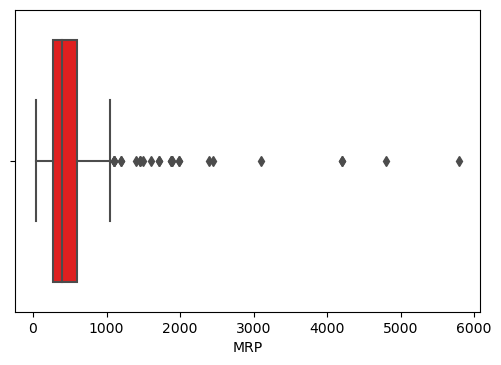

In [23]:
plt.figure(dpi=100)
sns.boxplot(books_df1['MRP'],color='red')

Interpretaions:
1.The interquartile range for the book price is around 300 to 700.
2.Minimum book price is near to 75.
3.More than 20 books has a price of greater than ~ 1250
4.Maximum book price is around 6500


<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='DiscountPrice', ylabel='Count'>

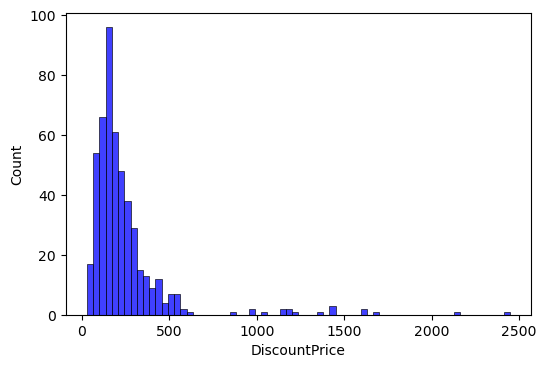

In [24]:
plt.figure(dpi=100)
sns.histplot(books_df1['DiscountPrice'],color='blue')

Interpretation:
Maximum discount is given to the books which price is less than 1000

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='Rating', ylabel='Density'>

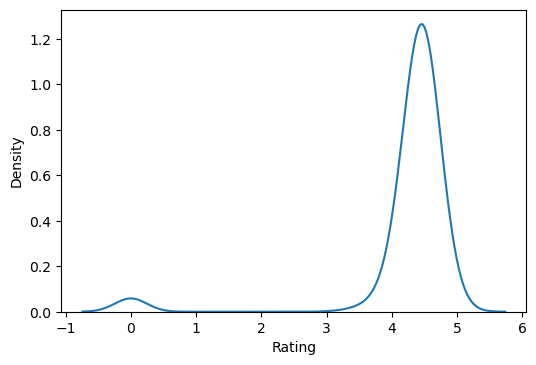

In [25]:
plt.figure(dpi=100)
sns.kdeplot(books_df1['Rating'])

Interpretation:
Maximum rating is in the range of 4-5, however 0 rating is also given to few books with a density around 0.1.

(array([ 21.,  11.,  16.,  48.,  84., 138., 140.,  35.,   2.,   2.]),
 array([15. , 22.1, 29.2, 36.3, 43.4, 50.5, 57.6, 64.7, 71.8, 78.9, 86. ]),
 <BarContainer object of 10 artists>)

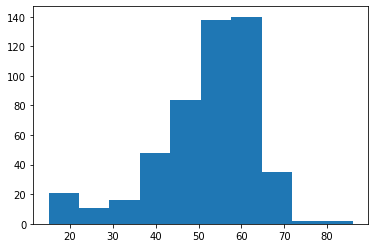

In [26]:
plt.hist('DiscountPercent',data=books_df1)

Interpretations:
1.Around 40% discount is given to 100 books.
2.Maximum discount(80%) is given to around 5 books.

<AxesSubplot:ylabel='Deals'>

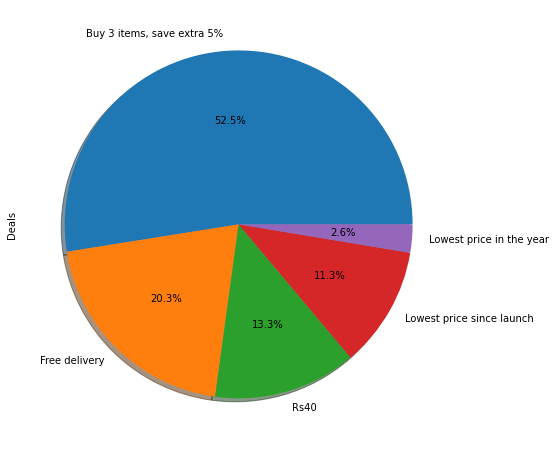

In [27]:
ax=plt.subplots(1,1,figsize=(12,10))
books_df1['Deals'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

Interpretations:
1.44% of books would be delivered without any shipping charges.
2.Flipkart has given extra saving of 5% to 43% books if buyer purchase 3 itmes at a time.
3.Shipping charges of rs40 will be taken for 8 % books.
4.16% books will be sold with lowest price since launch.


<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='Rating', ylabel='count'>

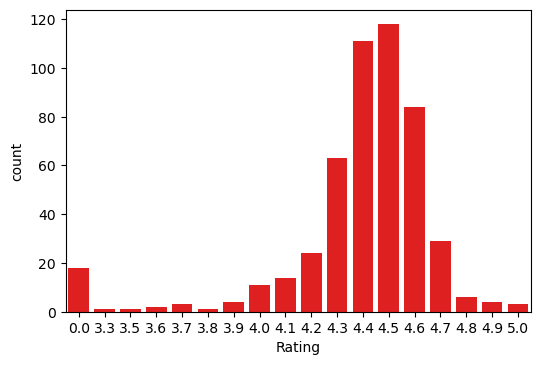

In [28]:
plt.figure(dpi = 100)
sns.countplot(x='Rating',data=books_df1,color='red')
plt.show()

Interpretations:
1.Lowest rating(0) is given to 30 books.
2.Buyers have not given ratings in the range of 1-3.
3.Maximum rating(5) is given to around 5 books only.
4.Flipkart has very good collections of the books as maximum rating is given in the range of 4-5.

<Figure size 1500x400 with 0 Axes>

<AxesSubplot:xlabel='Rating'>

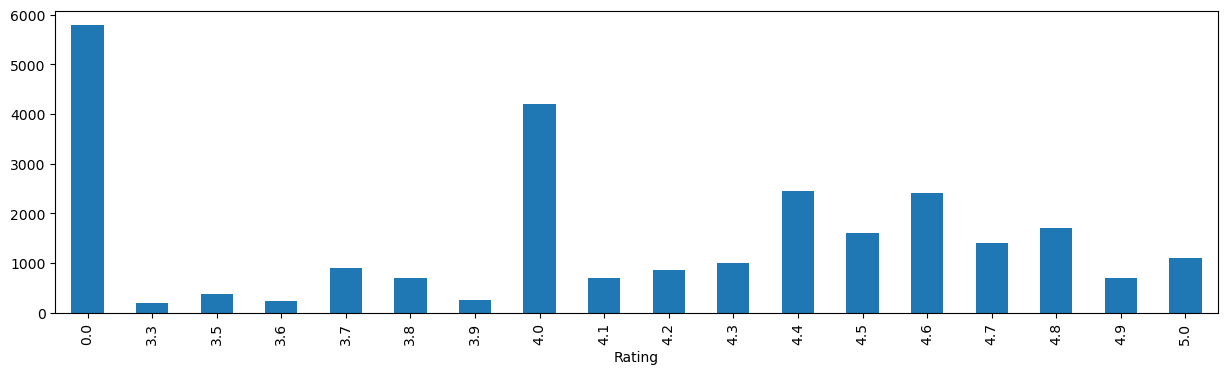

In [29]:
#Bivariate
#Continuous and Categorical
plt.figure(dpi = 100, figsize=(15,4))
books_df1.groupby(['Rating'])['MRP'].max().plot(kind = 'bar')

Interpretations:
1.Above average rating (in the range of 3.5 to 4) is given to the books which MRP price is lower than around 1200.
2.Expensive books has achieved maximum ratings (>4)

<Figure size 720x360 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<AxesSubplot:xlabel='Rating', ylabel='DiscountPrice'>

<Figure size 720x360 with 0 Axes>

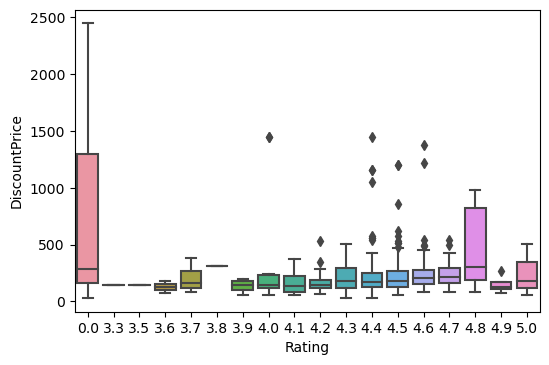

In [30]:
plt.figure(figsize=(10,5))
plt.figure(dpi = 100)
sns.boxplot(x="Rating", y="DiscountPrice", data = books_df1)

Interpretation:
The books sold with discount price in the range of IQR of 1500-2500 have achieved maximum rating of 5.

In [31]:
#Continuos to Continuos
books_df1.corr()

,MRP,DiscountPrice,DiscountPercent,Rating,PersonsReviewed
MRP,1.000000,0.935398,0.014345,-0.257490,-0.069752
DiscountPrice,0.935398,1.000000,-0.226969,-0.304167,-0.080454
DiscountPercent,0.014345,-0.226969,1.000000,0.193618,0.075128
Rating,-0.257490,-0.304167,0.193618,1.000000,0.088082
PersonsReviewed,-0.069752,-0.080454,0.075128,0.088082,1.000000


<Figure size 480x320 with 0 Axes>

<AxesSubplot:>

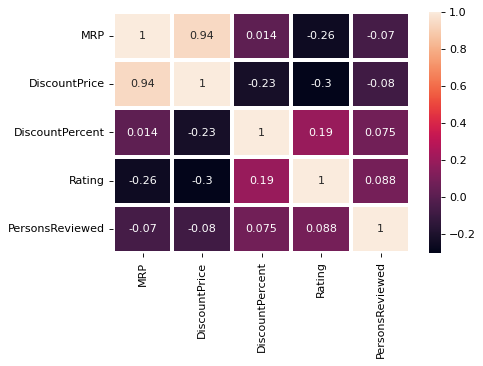

In [32]:

plt.figure(dpi = 80)
sns.heatmap(books_df1.corr(),linecolor='white',linewidths=2,annot=True)

<AxesSubplot:xlabel='MRP', ylabel='DiscountPercent'>

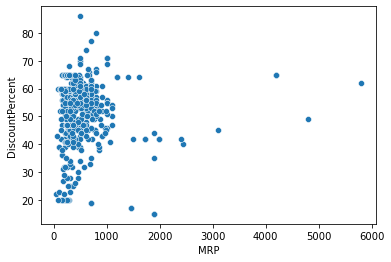

In [33]:
sns.scatterplot(x=books_df1["MRP"], y=books_df1["DiscountPercent"])

Interpretation:
Maximum discount percent is given to the books which MRP is less than 1500.

<AxesSubplot:xlabel='MRP', ylabel='DiscountPrice'>

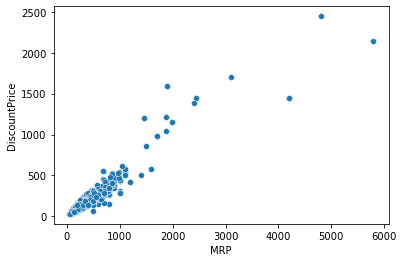

In [34]:
sns.scatterplot(x=books_df1["MRP"], y=books_df1["DiscountPrice"])

Interpretations:
1.Expensive books are sold with less discounts.
2.Discounted price is for the books which mrp is lower than 1500.

<AxesSubplot:xlabel='Rating', ylabel='PersonsReviewed'>

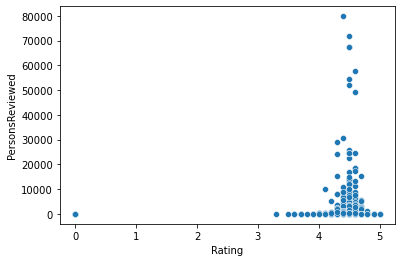

In [35]:
sns.scatterplot(x=books_df1["Rating"], y=books_df1["PersonsReviewed"])

Interpretations:
1.15000 reviwers has given the rating in the range of 4-5.
2.No one has given low ratings(0-3).

<Figure size 720x360 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

<AxesSubplot:xlabel='Deals'>

<Figure size 720x360 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

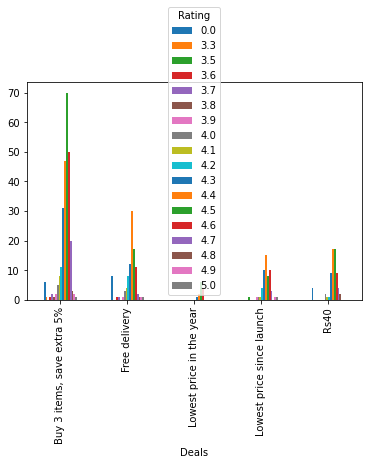

In [36]:
#Bivariate
#Categorical to Categorical
plt.figure(figsize=(10,5))
plt.figure(dpi = 500)
pd.crosstab(books_df1['Deals'],books_df1['Rating']).plot(kind='bar')

In [37]:
bk = books_df1.pivot_table(index="Deals",columns = "Rating",values = "PersonsReviewed",aggfunc = 'max')

In [38]:
bk

Rating,0.0,3.3,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Deals,,,,,,,,,,,,,,,,,,
"Buy 3 items, save extra 5%",0.0,7.0,NaN,20.0,31.0,19.0,49.0,438.0,382.0,5289.0,15267.0,8713.0,71755.0,18494.0,15159.0,179.0,10.0,5.0
Free delivery,0.0,NaN,NaN,66.0,7.0,NaN,55.0,407.0,10178.0,565.0,29221.0,10691.0,13298.0,3006.0,161.0,10.0,7.0,27.0
Lowest price in the year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,1446.0,13391.0,49122.0,NaN,NaN,NaN,NaN
Lowest price since launch,NaN,NaN,8.0,NaN,NaN,NaN,21.0,32.0,203.0,811.0,2479.0,4091.0,4626.0,3201.0,53.0,NaN,27.0,6.0
Rs40,0.0,NaN,NaN,NaN,NaN,NaN,NaN,29.0,53.0,84.0,24287.0,79802.0,22439.0,57753.0,1423.0,1023.0,NaN,NaN


###### 
- Maximum people around 71755 'buy 3 items save extra 5% deals' books with rating 4.5 and 3006 people have gone for free delivery books with rating 4.6

Interpretation:
Maximum ratings are given to the books which are sold with deals of 'free delivery' and 'buy 3 items,save extra 5%'.

Final Conclusion

Flipkart has very good collection of books as rating is given in the range of 4-5.
Inexpensive books(MRP<1500) has a very good rating.
Maximum discount is given to inexpensive books.
Maximum ratings or reviewer comments are given to the inexpensive books.It means that the books with lower prices are sold majorly.
It may be infered that more discount should be given to the expensive books to maximize the profit.
Flipkart can increase the stocks of the inexpensive books(<1500) to get maximum profit.
